# Facial Expression Detection using Convolutional Neural Networks 🤖📷

Facial expression detection is a fascinating field within computer vision that involves the recognition and interpretation of human emotions based on facial expressions. In this Jupyter Notebook, we'll build a Facial Expression Detection model using Convolutional Neural Networks (CNNs). This model will be trained to classify facial expressions into different emotion categories, such as happiness, sadness, anger, etc. 😊😢😠

### Goal 🚀💻
The primary goal of this project is to create an effective facial expression detection system that can be integrated into various applications, including human-computer interaction, virtual reality, and emotion-aware technology.

### Tools & Libraries 🛠️

We will be using the below tools and libriaries for our implementation
- TensorFlow: An open-source machine learning framework that includes tools for building and training deep learning models.
- Keras: A high-level neural network API that runs on top of TensorFlow, making it easier to build and experiment with deep learning models.
- Matplotlib: A visualisation library 📊🐍

## Implementation Steps
1. **Environment setup:** 
2. **Import necessary libraries:**
3. **Dataset collection:**
4. **Data Augmentation:**
5. **CNN model building:**
6. **Model training:**
7. **Model evaluation:**

Throughout the notebook, we'll provide detailed explanations, code snippets and visualizations to ensure a clear understanding of the entire process. 🧠🛠️

Let's get started! 🚀🚀🚀🚀

## Step 1: Environment setup
Ensure all necessary libraries are installed. Installation can be achieved using the below command

In [1]:
# Use the pip to install the necessary libraries
# !pip install tensorflow
# !pip install numpy
# !pip install matplotlib
# !pip install opencv-python


# The below code snippet is used to check the versions of the libraries
import tensorflow as tf
import numpy as np
import matplotlib
import cv2

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("OpenCV version:", cv2.__version__)





TensorFlow version: 2.15.0
NumPy version: 1.24.3
Matplotlib version: 3.7.2
OpenCV version: 4.9.0


## Step 2: Import necessary libraries

Import all required libraries in this section of your notebook. It is always good practice to keep your code tidy and well structured.

In [2]:
# operating system libraries
import os
import random

# Open Computer vision libraries
import cv2 as cv

# File operation libraries
import shutil
import yaml
import pandas as pd
import numpy as np

# Deep learning libraries
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam


# visualization libraries
import matplotlib.pyplot as plt

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

## Step 3: Dataset collection

For the purpose this exercise, we will use facial expression dataset named **[FER2013](https://www.kaggle.com/datasets/msambare/fer2013)** from Kaggle. 
The **[FER2013](https://www.kaggle.com/datasets/msambare/fer2013)** dataset is intended for use in facial expression recognition tasks.

According to the instructions on the Kaggle website, the entire data set is separated into train-test folders with image in grayscale All images are exactly 48 x 48 pixels.

The dataset is divided into two parts:

- train (28,709 images)
- test (7,178 images)


There are 8 emotion classes which are mapped as:
- 0- Anger
- 1- Disgust
- 2- Fear
- 3- Happy
- 4- Sad
- 5- Surprise
- 6- Neutral



In [3]:
# Define dataset directory
dataset_dir = "dataset/fer2013"

# Define image subdirectories for test, train, validation sets
train_image_dir = os.path.join(dataset_dir, "train")
test_image_dir = os.path.join(dataset_dir, "test")

# Lets try and list the image files in each directory
train_images = os.listdir(train_image_dir)
test_images = os.listdir(test_image_dir)


### Lets explore the data a little bit

In [4]:
def count_files_in_each_directory(directory):
    directory_counts = {}
    for dir_name in os.listdir(directory):
        directory_path = os.path.join(directory, dir_name)
        if os.path.isdir(directory_path):
            directory_counts[dir_name] = len(os.listdir(directory_path))
    return pd.DataFrame(directory_counts, index=['count'])
        
    

In [5]:
train_directory = dataset_dir + '/train'
test_directory = dataset_dir + '/test'

train_counts_df = count_files_in_each_directory(train_directory)
test_counts_df = count_files_in_each_directory(test_directory)

print("Train directory counts:")
print(train_counts_df)

print("\nTest directory counts:")
print(test_counts_df)

Train directory counts:
       angry  disgusted  fearful  happy  neutral   sad  surprised
count   3995        436     4097   7215     4965  4830       3171

Test directory counts:
       angry  disgusted  fearful  happy  neutral   sad  surprised
count    958        111     1024   1774     1233  1247        831


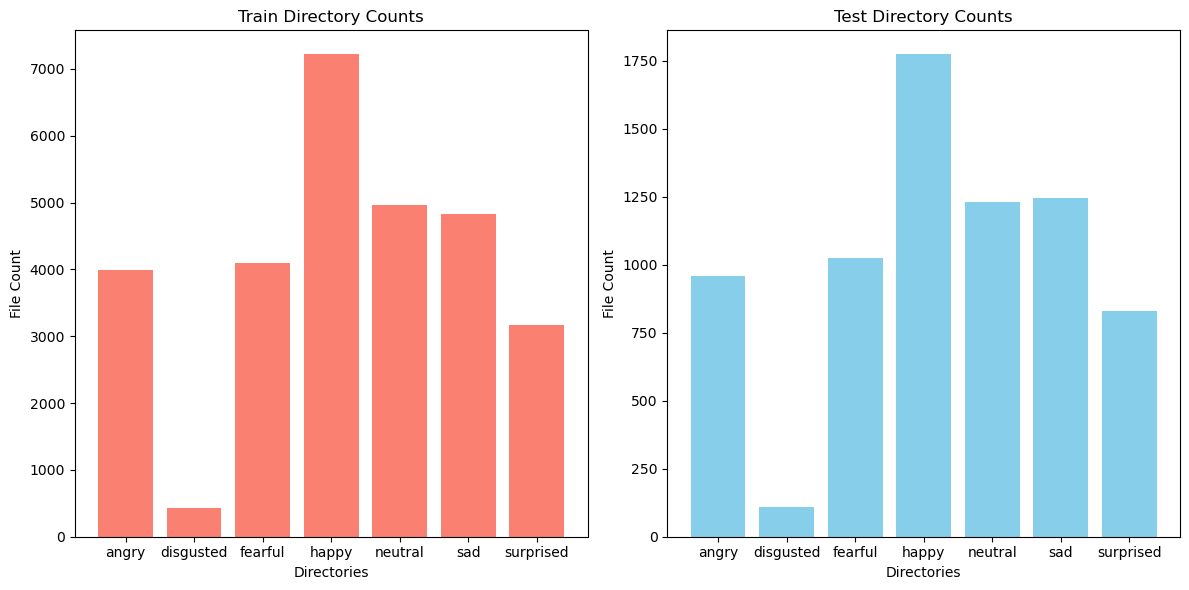

In [6]:
# Lets visualise the emotion distribution of the train and test data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train directory counts
axes[0].bar(train_counts_df.columns, train_counts_df.loc['count'], color='salmon')
axes[0].set_title('Train Directory Counts')
axes[0].set_xlabel('Directories')
axes[0].set_ylabel('File Count')

# Test directory counts
axes[1].bar(test_counts_df.columns, test_counts_df.loc['count'], color='skyblue')
axes[1].set_title('Test Directory Counts')
axes[1].set_xlabel('Directories')
axes[1].set_ylabel('File Count')

plt.tight_layout()
plt.show()


In [7]:
# Create a function to display some sample images from each directory
def display_images(dataset_path, image_dir):
    plt.figure(figsize=(8, 8))
    
    # Get the list of emotions from the directory
    emotions = [emotion for emotion in os.listdir(os.path.join(dataset_path, image_dir)) if os.path.isdir(os.path.join(dataset_path, image_dir, emotion))]
    
    num_emotions = len(emotions)
    fig, axes = plt.subplots(1, num_emotions, figsize=(num_emotions * 4, 4))
    
    # Loop through each emotion
    for i, emotion in enumerate(emotions):
        # Path to the directory containing images for the current emotion
        emotion_path = os.path.join(dataset_path, image_dir, emotion)
        # Get a list of image filenames in the directory
        image_files = os.listdir(emotion_path)
        
        # Take the first image for visualization
        sample_image = cv.imread(os.path.join(emotion_path, image_files[0]), cv.IMREAD_GRAYSCALE)
        
        # Display the image
        axes[i].imshow(sample_image, cmap='gray')
        axes[i].set_title(emotion)
        axes[i].axis('off')

plt.show()      

### Image Display

<Figure size 800x800 with 0 Axes>

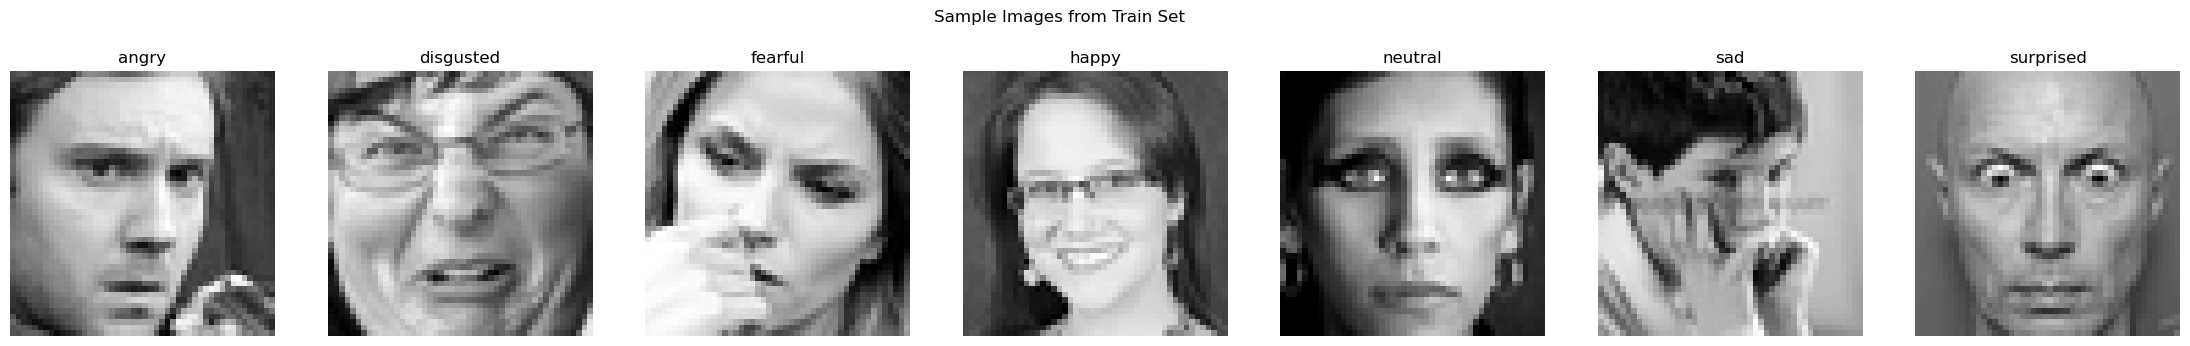

<Figure size 800x800 with 0 Axes>

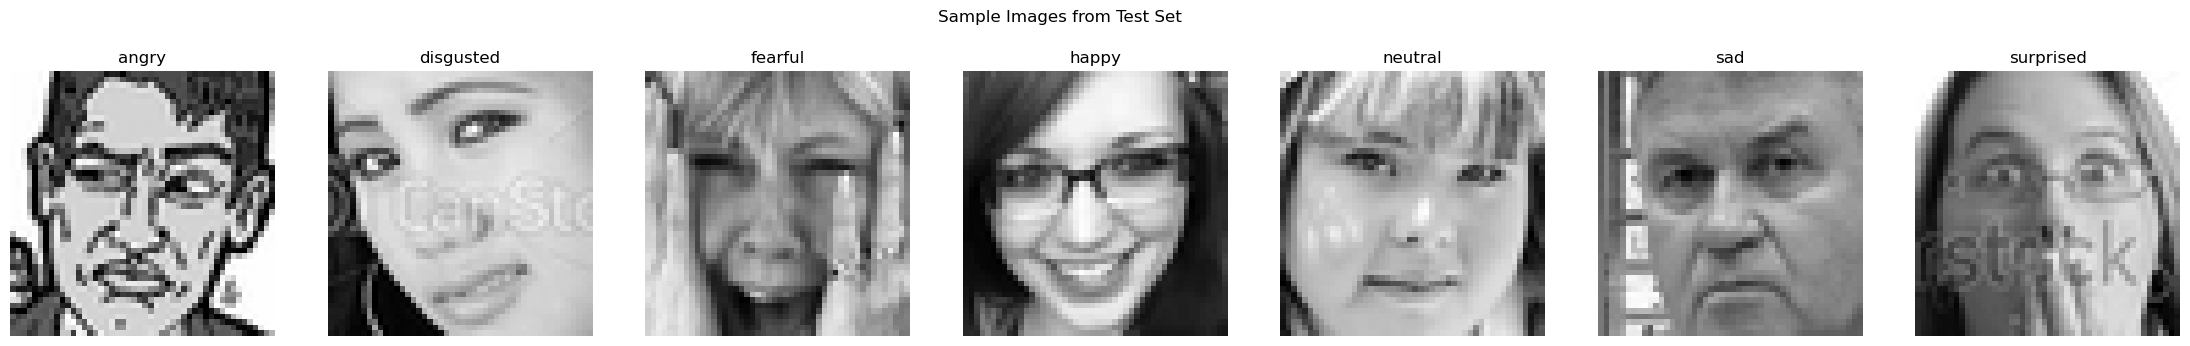

In [8]:
dataset_path = dataset_dir
train_image_dir = "train"
test_image_dir = "test"

# Display train set images
display_images(dataset_path, train_image_dir)
plt.suptitle('Sample Images from Train Set')
plt.show()

# Display Test set images
display_images(dataset_path, test_image_dir)
plt.suptitle('Sample Images from Test Set')
plt.show()



### Instantiate organize image directories

## Step 4: Data Augmentation:
The data augmentation helps to increase the diversity of the training dataset, thus improving the generalization of the model. TensorFlow provides

### Data augmentation

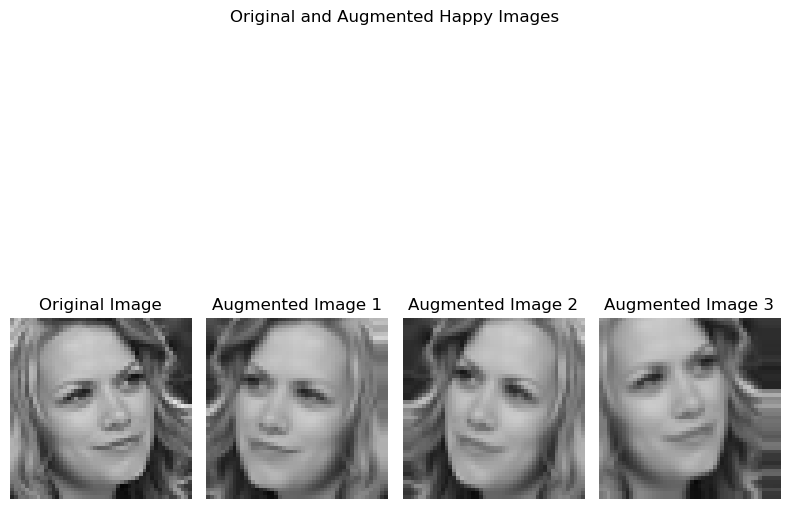

In [9]:
# Data augmentation parameters for training sets
train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest'
)

# Data augmentation for validation and test sets (usually no augmentation is necessary for these data sets)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess a sample image for demonstration
emotion = 'happy'
image_dir = 'train'

emotion_path = os.path.join(dataset_path, image_dir, emotion)
image_files = os.listdir(emotion_path)

# Select one random iamge from the defined emotion directory
selected_image_file = np.random.choice(image_files)


# Load the image
original_img = cv.imread(os.path.join(emotion_path, selected_image_file), cv.IMREAD_GRAYSCALE)
original_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
    

# Display original and augmented images for comparison
plt.figure(figsize=(8, 8))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Load the original image for augmentation
img = cv.imread(os.path.join(emotion_path, selected_image_file), cv.IMREAD_GRAYSCALE)
img = np.expand_dims(img, axis=-1)
    
# Reshape for data augmentation
img = img.reshape((1,) + img.shape)
    
# Generate augmentated images
i = 0
for batch in train_datagen.flow(img, batch_size=1):
    augmented_img = batch[0].squeeze()
    augmented_img = cv.cvtColor(augmented_img, cv.COLOR_BGR2RGB)
    
        
    # Display the augmented image
    plt.subplot(1, 4, i + 2)
    plt.imshow(augmented_img, cmap='gray')
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')

    # Lets Display three augmented images for demonstration
    i += 1
    if i == 3:
        break

plt.suptitle(f"Original and Augmented {emotion.capitalize()} Images")
plt.tight_layout()
plt.show()

### Image generators

In [10]:
# ImageDataGenerator??

In [11]:
# Define image directories, train, test sets for image generators
train_image_dir = os.path.join(dataset_path, "train")
test_image_dir = os.path.join(dataset_path, "test")

In [12]:
# Define Constants
image_shape = (96, 96, 3) # maintain original sizes of the image
batch_size = 32

# Create generator for training, validation, and test sets

# train_datagen

train_generator = train_datagen.flow_from_directory(
    train_image_dir,
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True, # Enable shuffle to make model more robust
    subset='training'
)

# validation_datagen
validation_generator = train_datagen.flow_from_directory(
    train_image_dir,
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False, # Disable shuffle to maintain order of labels
    subset='validation'
)

# test_datagen
test_generator = test_datagen.flow_from_directory(
    test_image_dir,
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False, # Disable shuffle to maintain order of labels
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
train_generator.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

## Step 5: CNN model building:

Our model architecture for this task will comprise of **3 convolutional layers** with **2 fully connected layers**. <br>
1. The first convolutional layer comprises of **32 filters** with a **kernel of 3x3** and **1 stride** with an input shape of **96 x 96 x 3** and activation function as **ReLu**.
2. The second convolutional layer comprises of **64 filters** with a **kernel of 3x3** and activation function as **ReLu**
3. The third convolutional layer comprises of **128 filters** with a **kernel of 3x3** and activation function as **ReLu**
4. The first fully connected layer comprise of **256 hidden neurons** and activation function as **ReLu**
5. The second fully connected layer comprise of **8 output neurons** and activation function as **softmax**

Note:
References are made to the **[TensorFlow CNN model example](https://www.tensorflow.org/tutorials/images/cnn)** and **[Keras image classification example](https://keras.io/examples/vision/image_classification_from_scratch/)** from the official TensorFlow and Keras website.

In [14]:
# create sequential module
cnn_model = Sequential()

# First Convolution layer
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=image_shape))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))

# Second Convolution layer
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Third Convolution layer
cnn_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Fourth Convolution layer
cnn_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Flatten the neural network to feed to DNN
cnn_model.add(Flatten())

# First fully connected layer
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.25))

# Second fully connected layer
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.25))

# Third fully connected layer
cnn_model.add(Dense(7, activation='softmax'))

In [15]:
# # Image Shape
# image_shape = (48, 48, 3)

# # create sequential module
# cnn_model = Sequential()

# cnn_model.add(InputLayer(input_shape=image_shape))

# # First Convolution layer
# cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32, kernel_size=3, activation='relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(64, kernel_size=3, activation='relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# cnn_model.add(MaxPooling2D(2,2))
# cnn_model.add(Dropout(0.25))
# cnn_model.add(Flatten())
# cnn_model.add(Dense(512, activation='relu'))
# cnn_model.add(Dense(7, activation='softmax'))

### 5.1 Compile the model
I mostly make use of **[TensorFlow official reference doc](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
)** when building deep nueral network models

In [16]:
# introduced LR
# cnn_model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Lets display the architecture of our model
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 94, 94, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 45, 45, 128)       512       
 chNormalization)                                                
                                                       

## Step 6: Model training :
In this section we train the model using the prepared data generators and monitor its performance over multiple epochs.

In [17]:
# Instantiate early stopping (This helps monitor validation loss and prevent possible overfitting)

# stop training when there is no accuracy improvement
early_stopping  = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,
    restore_best_weights=True
)

# reduce learning rate if plateau
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    min_lr=0.0,
    mode='min'
    
)

# Callback definition
callbacks = [
    early_stopping,
    lr_reduce
]

In [18]:
# use the ?? to get a complete description of the commands. 

# cnn_model.fit??

In [19]:
# Train model
train_history = cnn_model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    
)

Epoch 1/50


718/718 [==============================] - 139s 192ms/step - loss: 1.9403 - accuracy: 0.2515 - val_loss: 1.7736 - val_accuracy: 0.2867 - lr: 0.0010
Epoch 2/50
718/718 [==============================] - 126s 175ms/step - loss: 1.6489 - accuracy: 0.3517 - val_loss: 2.4873 - val_accuracy: 0.1683 - lr: 0.0010
Epoch 3/50
718/718 [==============================] - 125s 174ms/step - loss: 1.4864 - accuracy: 0.4241 - val_loss: 1.8011 - val_accuracy: 0.2087 - lr: 0.0010
Epoch 4/50
718/718 [==============================] - 126s 175ms/step - loss: 1.3734 - accuracy: 0.4739 - val_loss: 1.2992 - val_accuracy: 0.5086 - lr: 1.0000e-04
Epoch 5/50
718/718 [==============================] - 124s 172ms/step - loss: 1.3362 - accuracy: 0.4867 - val_loss: 1.2773 - val_accuracy: 0.5090 - lr: 1.0000e-04
Epoch 6/50
718/718 [==============================] - 123s 172ms/step - loss: 1.3123 - accuracy: 0.4984 - val_loss: 1.2428 - val_accuracy: 0.5260 - lr: 1.0000e-04
Epoch 7/50
718/718 [============

718/718 [==============================] - 123s 172ms/step - loss: 1.0463 - accuracy: 0.6070 - val_loss: 1.0082 - val_accuracy: 0.6258 - lr: 1.0000e-12
Epoch 49/50
718/718 [==============================] - 123s 171ms/step - loss: 1.0466 - accuracy: 0.6109 - val_loss: 1.0094 - val_accuracy: 0.6239 - lr: 1.0000e-12


## Step 7: Model evaluation :
We evaluate the trained model's performance by visualizing training history.

In [20]:
# We create two functions to help us visualize the loss and accuracy of the model

def plot_loss(train_loss, val_loss):
    fig, ax = plt.subplots()
    ax.plot(train_loss, color='teal', label='Training Loss')
    ax.plot(val_loss, color='orange', label='Validation Loss')
    
    ax.set_title('Loss', fontsize=20)
    ax.legend(loc="upper left")
    plt.show()

def plot_accuracy(train_accuracy, val_accuracy):
    fig, ax = plt.subplots()
    ax.plot(train_accuracy, color='teal', label='Training Accuracy')
    ax.plot(val_accuracy, color='orange', label='Validation Accuracy')
    
    ax.set_title('Accuracy', fontsize=20)
    ax.legend(loc="upper left")
    plt.show()

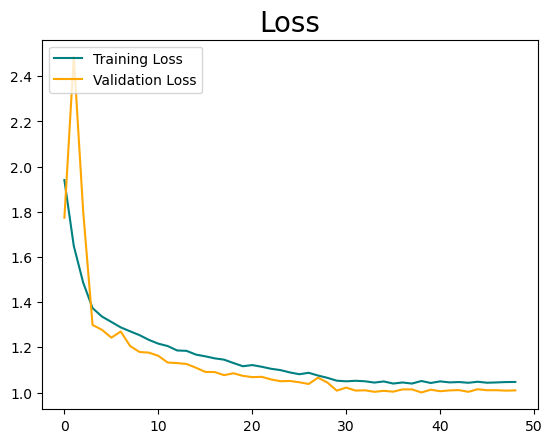

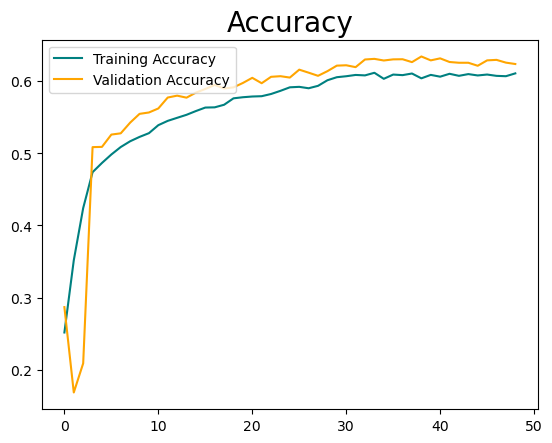

In [21]:
# Plot the loss graph
train_loss_history = train_history.history['loss']
val_loss_history = train_history.history['val_loss']
plot_loss(train_loss_history, val_loss_history)

# Plot the accuracy
train_accuracy_history = train_history.history['accuracy']
val_accuracy_history = train_history.history['val_accuracy']
plot_accuracy(train_accuracy_history, val_accuracy_history)

### Save the model

In [22]:
cnn_model.save('model/emotion_detection_model.h5')

### Load the Model and explore its predictive power on the test data

In [23]:
# load the saved model
loaded_model = load_model('model/emotion_detection_model.h5')

In [49]:
# Function to preprocess and convert grayscale images to RGB
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(96, 96), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_rgb = np.repeat(img_array, 3, axis=-1)  # Repeat single channel to create RGB image
    img_rgb = img_rgb / 255.0  # Normalize RGB values
    return img_rgb

# Function to predict emotion for an image
def predict_emotion(img_path):
    img_rgb = preprocess_image(img_path)
    img_array = np.expand_dims(img_rgb, axis=0)
    prediction = cnn_model.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Function to display correctly and incorrectly predicted images
def visualize_predictions(test_generator):
    class_labels = list(test_generator.class_indices.keys())
    num_images = len(test_generator.filenames)
    num_correct = 0
    num_incorrect = 0
    fig, axs = plt.subplots(4, 10, figsize=(20, 8))
    for i in range(num_images):
        img_path = os.path.join('dataset/fer2013/test', test_generator.filenames[i])
        actual_class_index = np.argmax(test_generator.labels[i])
        actual_class = class_labels[actual_class_index]
        predicted_class = predict_emotion(img_path)
        if predicted_class == actual_class_index:
            if num_correct < 20:
                ax = axs[num_correct // 10, num_correct % 10]
                ax.imshow(image.load_img(img_path, target_size=(96, 96), color_mode='grayscale'), cmap='gray')
                ax.set_title(f'Actual: {actual_class}\nPredicted: {class_labels[predicted_class]}')
                ax.axis('off')
                num_correct += 1
        else:
            if num_incorrect < 20:
                ax = axs[2 + num_incorrect // 10, num_incorrect % 10]
                ax.imshow(image.load_img(img_path, target_size=(96, 96), color_mode='grayscale'), cmap='gray')
                ax.set_title(f'Actual: {actual_class}\nPredicted: {class_labels[predicted_class]}')
                ax.axis('off')
                num_incorrect += 1
        if num_correct >= 20 and num_incorrect >= 20:
            break
    plt.tight_layout()
    plt.show()

### This section visualizes the first 20 correctly predicted images and first 20 incorrectly predicted  images

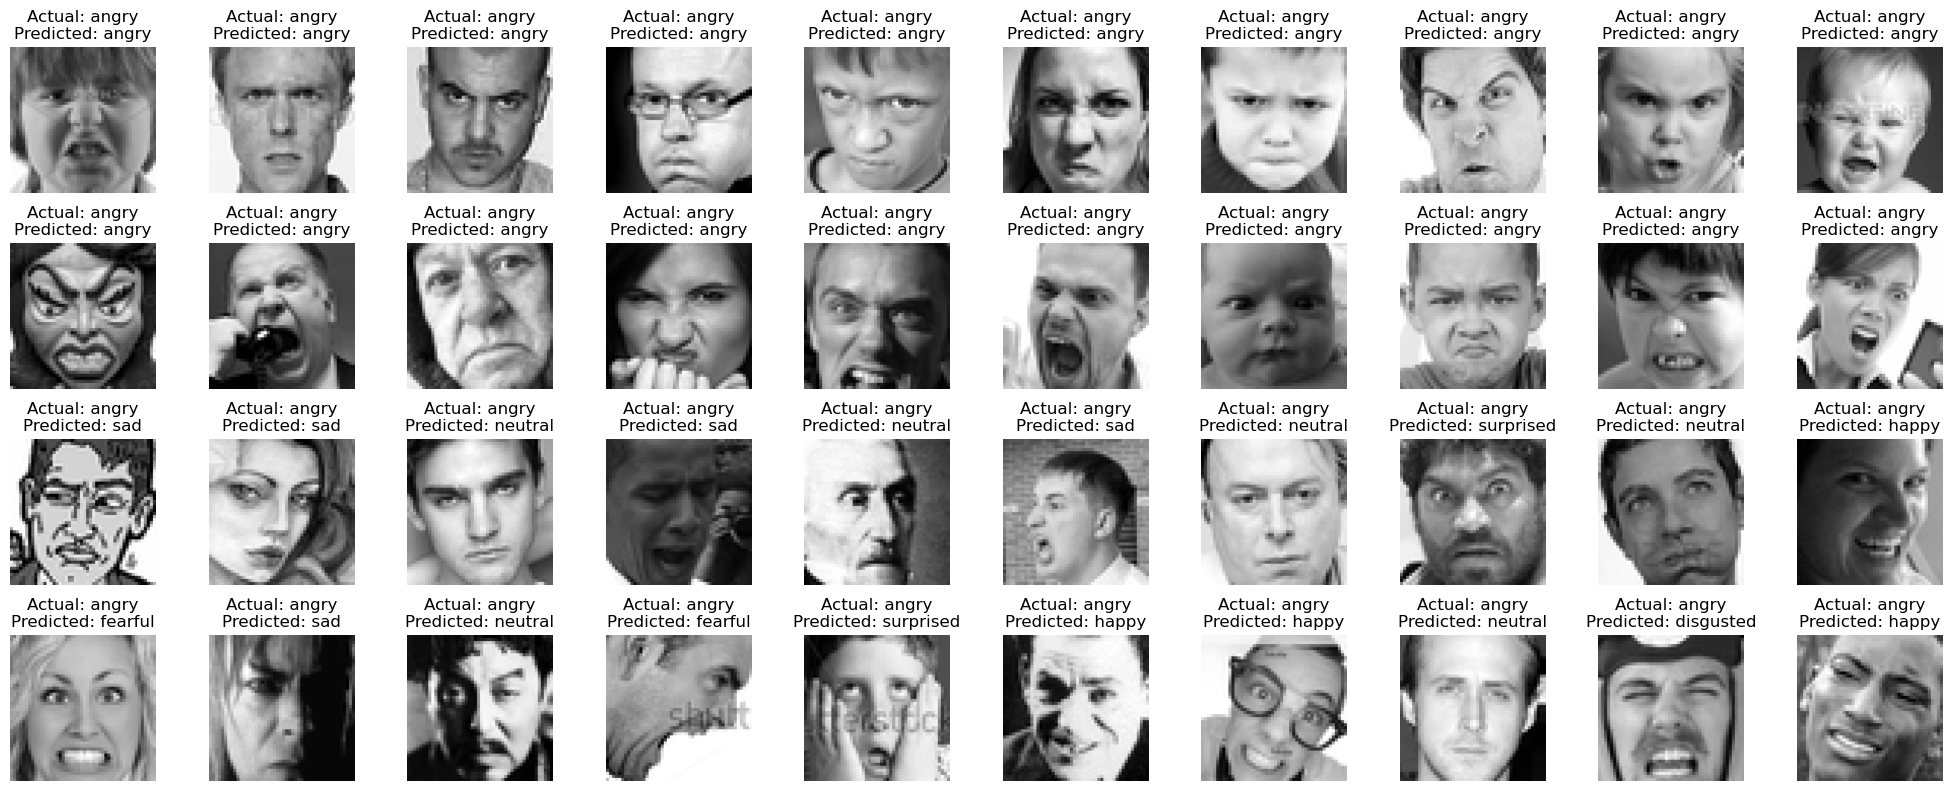

In [50]:
# Visualize predictions for test images
visualize_predictions(test_generator)